In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model, svm
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

## import data 

In [3]:
data = pd.read_csv("data/train.csv")

In [4]:
df = data.drop(columns = ['Name','RescuerID','PetID','Description'])
y = df['AdoptionSpeed']
X = df.drop(columns = ['AdoptionSpeed'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 20 columns):
Type             14993 non-null int64
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
VideoAmt         14993 non-null int64
PhotoAmt         14993 non-null float64
AdoptionSpeed    14993 non-null int64
dtypes: float64(1), int64(19)
memory usage: 2.3 MB


In [6]:
df.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,0,1.0,2
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,0,2.0,0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,7.0,3
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,8.0,2
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,3.0,2


## missing

In [26]:
np.sum(df['MaturitySize']==0)

0

In [27]:
np.sum(df['FurLength']==0)

0

In [29]:
np.sum(df['Vaccinated']==3)

1868

In [30]:
np.sum(df['Dewormed']==3)

1781

In [31]:
np.sum(df['Sterilized']==3)

1815

In [32]:
np.sum(df['Health']==0)

0

In [43]:
np.sum((df['Vaccinated']==3) & (df['Dewormed']==3) & (df['Sterilized']==3))

1003

In [42]:
np.sum(df['VideoAmt']!=0)

574

In [43]:
np.sum(df['PhotoAmt']==0)

341

In [46]:
np.max(df['Age'])

255

In [7]:
df = df[np.logical_not(np.logical_and(df['Breed1'] == 0, df['Breed2'] != 0))]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14988 entries, 0 to 14992
Data columns (total 20 columns):
Type             14988 non-null int64
Age              14988 non-null int64
Breed1           14988 non-null int64
Breed2           14988 non-null int64
Gender           14988 non-null int64
Color1           14988 non-null int64
Color2           14988 non-null int64
Color3           14988 non-null int64
MaturitySize     14988 non-null int64
FurLength        14988 non-null int64
Vaccinated       14988 non-null int64
Dewormed         14988 non-null int64
Sterilized       14988 non-null int64
Health           14988 non-null int64
Quantity         14988 non-null int64
Fee              14988 non-null int64
State            14988 non-null int64
VideoAmt         14988 non-null int64
PhotoAmt         14988 non-null float64
AdoptionSpeed    14988 non-null int64
dtypes: float64(1), int64(19)
memory usage: 2.4 MB


## Age Dist

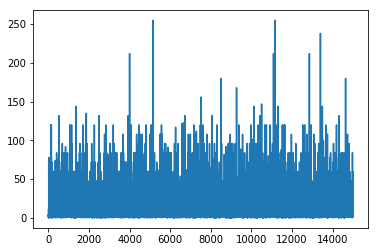

In [19]:
plt.plot(df['Age'])

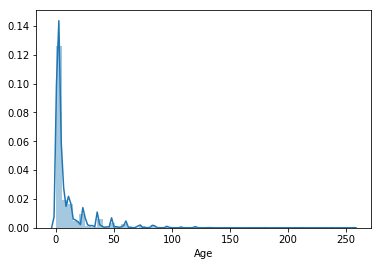

In [9]:
sns.distplot(df['Age'])

## One hot encoder

In [35]:
df_dum_breed1 = pd.get_dummies(df['Breed1'], drop_first = True)

In [36]:
df_dum_breed1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14988 entries, 0 to 14992
Columns: 174 entries, 3 to 307
dtypes: uint8(174)
memory usage: 2.6 MB


In [37]:
df_dum_breed2 = pd.get_dummies(df['Breed2'], drop_first = True)

In [38]:
df_dum_breed2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14988 entries, 0 to 14992
Columns: 134 entries, 1 to 307
dtypes: uint8(134)
memory usage: 2.0 MB


In [40]:
df_dum_age = pd.get_dummies(df['Age'], drop_first = True)

In [42]:
df_dum_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14988 entries, 0 to 14992
Columns: 105 entries, 1 to 255
dtypes: uint8(105)
memory usage: 1.6 MB


## Random Forest Treem

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [11]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3,
                                 random_state=0, oob_score= True)

In [12]:
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [13]:
print(clf.feature_importances_)

[2.16816624e-02 3.67066563e-01 1.58099349e-01 8.34289938e-03
 4.37541166e-03 4.75116851e-03 1.27263243e-03 3.33305251e-04
 2.03301064e-02 2.18993796e-02 5.13439293e-02 1.34176420e-02
 1.68683675e-01 8.68886924e-04 2.17621532e-02 5.45937420e-03
 1.86064685e-02 1.04273585e-03 1.10662659e-01]


In [14]:
clf.score(X,y)

0.3633028746748483

In [15]:
clf.oob_score_

0.3606349629827253

In [16]:
predicted = clf.predict(X)

## LASSO

In [38]:
lasso = linear_model.Lasso()

In [40]:
print(cross_val_score(lasso, df, y, cv=3))

[0.47426555 0.46651961 0.47583536]


In [50]:
svc = svm.SVC(C=1, kernel='linear')

In [ ]:
svc.fit(df[:-100], y[:-100]).score(df[-100:], y[-100:])

## Evaluation

In [59]:
predicted

array([2, 2, 2, ..., 2, 4, 2])

In [61]:
y-predicted

0        0
1       -2
2        1
3       -2
4        0
5        0
6       -3
7        1
8       -1
9        0
10      -1
11      -1
12       0
13      -1
14      -2
15       0
16      -1
17       0
18       0
19       2
20      -2
21       2
22       0
23       0
24      -1
25      -2
26      -1
27       0
28      -1
29       0
        ..
14963   -3
14964    0
14965   -3
14966    0
14967   -3
14968    2
14969    0
14970    1
14971   -1
14972   -1
14973    0
14974    0
14975    0
14976   -1
14977    2
14978    0
14979    0
14980    0
14981   -1
14982    1
14983    0
14984    0
14985    0
14986    1
14987   -4
14988    0
14989    0
14990    1
14991    0
14992    1
Name: AdoptionSpeed, Length: 14993, dtype: int64

In [26]:
N = 5
W = np.zeros((N,N))
O = np.zeros((N,N))
E = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        W[i,j] = (np.square(i-j)) / (np.square(N-1))

In [27]:
for i in range(len(y)):
    O[y[i],predicted[i]] += 1
    E[y[i],y[i]] +=1

In [28]:
W

array([[0.    , 0.0625, 0.25  , 0.5625, 1.    ],
       [0.0625, 0.    , 0.0625, 0.25  , 0.5625],
       [0.25  , 0.0625, 0.    , 0.0625, 0.25  ],
       [0.5625, 0.25  , 0.0625, 0.    , 0.0625],
       [1.    , 0.5625, 0.25  , 0.0625, 0.    ]])

In [29]:
O

array([[0.000e+00, 2.000e+00, 2.090e+02, 0.000e+00, 1.990e+02],
       [0.000e+00, 2.000e+00, 1.912e+03, 1.000e+00, 1.175e+03],
       [0.000e+00, 0.000e+00, 2.432e+03, 5.000e+00, 1.600e+03],
       [0.000e+00, 0.000e+00, 1.703e+03, 1.000e+01, 1.546e+03],
       [0.000e+00, 0.000e+00, 1.193e+03, 1.000e+00, 3.003e+03]])

In [30]:
E

array([[ 410.,    0.,    0.,    0.,    0.],
       [   0., 3090.,    0.,    0.,    0.],
       [   0.,    0., 4037.,    0.,    0.],
       [   0.,    0.,    0., 3259.,    0.],
       [   0.,    0.,    0.,    0., 4197.]])

In [40]:
total = np.sum(E)

In [47]:
EE = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        EE[i,j] = E[i,i]/total*E[j,j]

In [48]:
EE

array([[  11.21189889,   84.49943307,  110.39618489,   89.1209231 ,
         114.77156006],
       [  84.49943307,  636.83719069,  832.01027146,  671.66744481,
         864.98565997],
       [ 110.39618489,  832.01027146, 1086.99853265,  877.51504035,
        1130.07997065],
       [  89.1209231 ,  671.66744481,  877.51504035,  708.40265457,
         912.29393717],
       [ 114.77156006,  864.98565997, 1130.07997065,  912.29393717,
        1174.86887214]])

In [35]:
(W*O)

array([[0.000000e+00, 1.250000e-01, 5.225000e+01, 0.000000e+00,
        1.990000e+02],
       [0.000000e+00, 0.000000e+00, 1.195000e+02, 2.500000e-01,
        6.609375e+02],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 3.125000e-01,
        4.000000e+02],
       [0.000000e+00, 0.000000e+00, 1.064375e+02, 0.000000e+00,
        9.662500e+01],
       [0.000000e+00, 0.000000e+00, 2.982500e+02, 6.250000e-02,
        0.000000e+00]])

In [49]:
W*EE

array([[  0.        ,   5.28121457,  27.59904622,  50.13051924,
        114.77156006],
       [  5.28121457,   0.        ,  52.00064197, 167.9168612 ,
        486.55443374],
       [ 27.59904622,  52.00064197,   0.        ,  54.84469002,
        282.51999266],
       [ 50.13051924, 167.9168612 ,  54.84469002,   0.        ,
         57.01837107],
       [114.77156006, 486.55443374, 282.51999266,  57.01837107,
          0.        ]])

In [50]:
1-np.sum(W*O)/np.sum(W*EE)

0.2554695779164442

In [51]:
np.sum(W*O)

1933.75

In [52]:
np.sum(W*EE)

2597.274661508704

In [53]:
def get_score(y, predicted):
    N = 5
    W = np.zeros((N,N))
    O = np.zeros((N,N))
    E = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            W[i,j] = (np.square(i-j)) / (np.square(N-1))
    for i in range(len(y)):
        O[y[i],predicted[i]] += 1
        E[y[i],y[i]] +=1
    total = np.sum(E)
    EE = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            EE[i,j] = E[i,i]/total*E[j,j]
    result = 1-np.sum(W*O)/np.sum(W*EE)
    return result

## check test if missing

In [7]:
test = pd.read_csv("data/test/test.csv")

In [9]:
test.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt
0,1,Puppy,2,307,0,1,1,0,0,2,...,2,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,"Puppy is calm for a young dog, but he becomes ...",378fcc4fc,3.0
1,2,London,24,266,0,1,2,7,0,2,...,1,1,1,0,41326,4475f31553f0170229455e3c5645644f,0,Urgently seeking adoption. Please contact for ...,73c10e136,1.0
2,2,Snowball,20,266,0,2,7,0,0,2,...,1,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,Snowball... doesn't look so good (she is healt...,72000c4c5,1.0
3,2,Malibu,5,266,252,2,1,6,7,2,...,1,1,1,100,41326,4475f31553f0170229455e3c5645644f,0,"Malibu: Female, Local Mix, 4-5 months, vaccina...",e147a4b9f,1.0
4,1,Lala Girl,6,307,0,2,1,2,7,2,...,1,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,LALA! That's my name. I'm a 6 month old girl d...,43fbba852,1.0


## Feature Engineering